Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob


In [2]:
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


In [3]:
from tensorflow.keras import preprocessing

In [4]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path('Skin_Cancer/Train')
data_dir_test = pathlib.Path('Skin_Cancer/Test')

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [7]:
data_dir_train

WindowsPath('Skin_Cancer/Train')

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [8]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [9]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [10]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [11]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

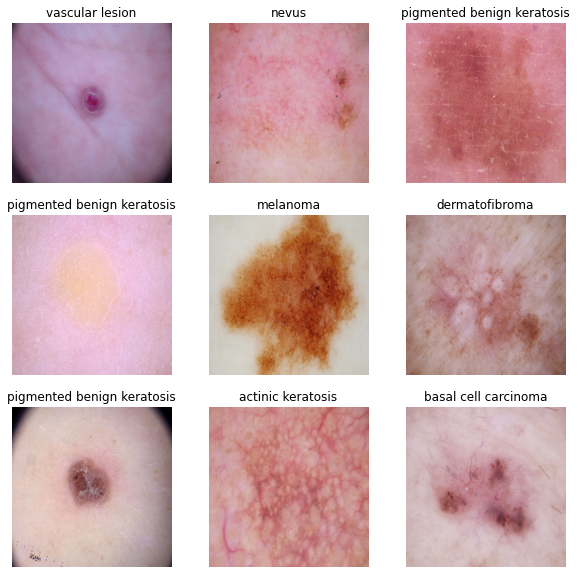

In [12]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [14]:
### Your code goes here
num_classes=9
model=Sequential()
model.add((layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3))))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [15]:
### Todo, choose an appropirate optimiser and loss function
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 180, 180, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 178, 178, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 178, 178, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 89, 89, 64)        1

### Train the model

In [17]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 31s 239ms/step - loss: 2.4915 - accuracy: 0.2079 - val_loss: 1.7234 - val_accuracy: 0.3915
Epoch 2/20
56/56 [==============================] - 9s 161ms/step - loss: 1.7187 - accuracy: 0.3932 - val_loss: 1.6777 - val_accuracy: 0.4027
Epoch 3/20
56/56 [==============================] - 9s 161ms/step - loss: 1.5863 - accuracy: 0.4329 - val_loss: 1.6597 - val_accuracy: 0.4049
Epoch 4/20
56/56 [==============================] - 9s 161ms/step - loss: 1.5713 - accuracy: 0.4362 - val_loss: 1.4524 - val_accuracy: 0.5414
Epoch 5/20
56/56 [==============================] - 9s 161ms/step - loss: 1.3703 - accuracy: 0.5095 - val_loss: 1.4231 - val_accuracy: 0.5436
Epoch 6/20
56/56 [==============================] - 9s 162ms/step - loss: 1.2414 - accuracy: 0.5790 - val_loss: 1.4614 - val_accuracy: 0.4944
Epoch 7/20
56/56 [==============================] - 9s 162ms/step - loss: 1.2474 - accuracy: 0.5774 - val_loss: 1.4915 - val_accuracy: 0.5526
Epoch

### Visualizing training results

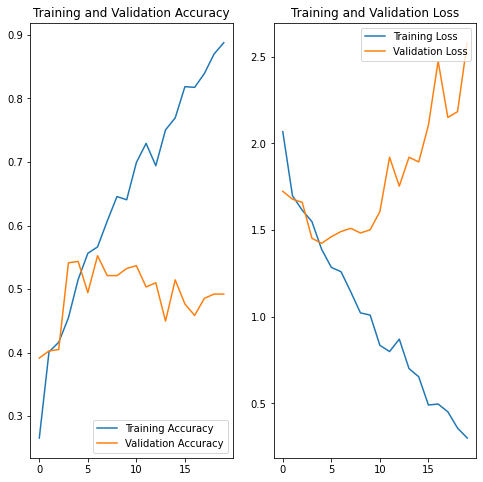

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit




From the above out out and visualisation, it can be seen that the training accuracy is high but validation accuracy is low. This clearly indicated that the model is overfitting

In [19]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

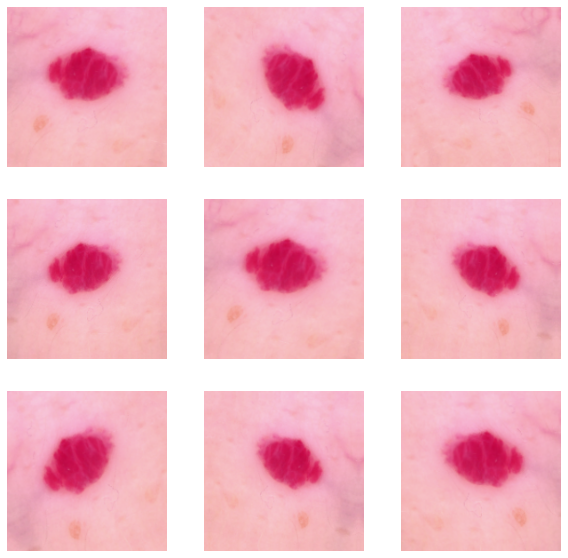

In [20]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [21]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
num_classes=9
model=Sequential()
model.add((layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3))))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

### Compiling the model

In [22]:
## Your code goes here
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 180, 180, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 180, 180, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 178, 178, 32)      9248      
_________________________________________________________________
activation_7 (Activation)    (None, 178, 178, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 89, 89, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 89, 89, 32)       

### Training the model

In [24]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 10s 167ms/step - loss: 2.9690 - accuracy: 0.1780 - val_loss: 2.0513 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 9s 166ms/step - loss: 2.0246 - accuracy: 0.2208 - val_loss: 1.8810 - val_accuracy: 0.3154
Epoch 3/20
56/56 [==============================] - 9s 166ms/step - loss: 1.8876 - accuracy: 0.3259 - val_loss: 1.8257 - val_accuracy: 0.3445
Epoch 4/20
56/56 [==============================] - 9s 166ms/step - loss: 1.8444 - accuracy: 0.3165 - val_loss: 1.6298 - val_accuracy: 0.4318
Epoch 5/20
56/56 [==============================] - 9s 166ms/step - loss: 1.7037 - accuracy: 0.3571 - val_loss: 1.6135 - val_accuracy: 0.4497
Epoch 6/20
56/56 [==============================] - 9s 166ms/step - loss: 1.5961 - accuracy: 0.4448 - val_loss: 1.6331 - val_accuracy: 0.4228
Epoch 7/20
56/56 [==============================] - 9s 166ms/step - loss: 1.6009 - accuracy: 0.4354 - val_loss: 1.5130 - val_accuracy: 0.4631
Epoch

### Visualizing the results

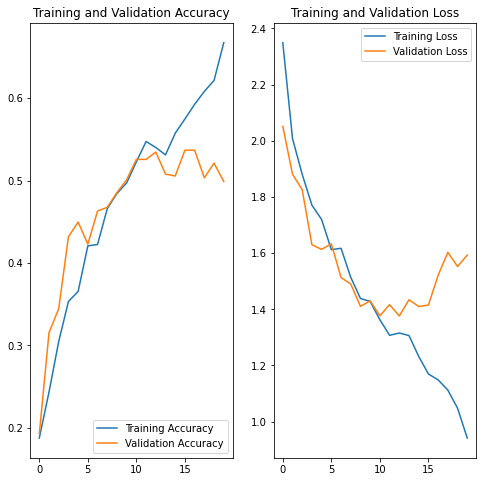

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?


After data agumentation and dropouts, model became more general. Gap between train and val accuracy reduced a lot just by applying transformations to training images. Train accuracy 66% val accuracy = 50%. However there is need to improve the accuracy

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [26]:
#check  class names
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [27]:
## Your code goes here.
path_to_training_dataset="Skin_Cancer/Train/"
for i in class_names:
    directory =path_to_training_dataset+i
    class_directory = pathlib.Path(directory)
    length=len(list(class_directory.glob('*.jpg')))
    print(f'number of samples for {i} =====>> {length} samples.')


number of samples for actinic keratosis =====>> 114 samples.
number of samples for basal cell carcinoma =====>> 376 samples.
number of samples for dermatofibroma =====>> 95 samples.
number of samples for melanoma =====>> 438 samples.
number of samples for nevus =====>> 357 samples.
number of samples for pigmented benign keratosis =====>> 462 samples.
number of samples for seborrheic keratosis =====>> 77 samples.
number of samples for squamous cell carcinoma =====>> 181 samples.
number of samples for vascular lesion =====>> 139 samples.


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?

seborrheic keratosis

#### - Which classes dominate the data in terms proportionate number of samples?

pigmented benign keratosis


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [28]:
#!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [29]:
#!pip install Augmentor==0.2.8
#import Augmentor

In [30]:
path_to_training_dataset="Skin_Cancer/Train/"

import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Skin_Cancer/Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20FE52E0948>: 100%|██████████| 500/500 [00:02<00:00, 210.56 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to Skin_Cancer/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20F9BEF08C8>: 100%|██████████| 500/500 [00:02<00:00, 205.47 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to Skin_Cancer/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20F8CA15248>: 100%|██████████| 500/500 [00:02<00:00, 203.30 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to Skin_Cancer/Train/melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x20F8CA81B88>: 100%|██████████| 500/500 [00:14<00:00, 33.63 Samples/s]  


Initialised with 357 image(s) found.
Output directory set to Skin_Cancer/Train/nevus\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x20F83047508>: 100%|██████████| 500/500 [00:11<00:00, 42.96 Samples/s]   


Initialised with 462 image(s) found.
Output directory set to Skin_Cancer/Train/pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x20F83047D48>: 100%|██████████| 500/500 [00:02<00:00, 201.18 Samples/s]


Initialised with 77 image(s) found.
Output directory set to Skin_Cancer/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x20F8E255E08>: 100%|██████████| 500/500 [00:06<00:00, 79.49 Samples/s]                   


Initialised with 181 image(s) found.
Output directory set to Skin_Cancer/Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20F8CA09648>: 100%|██████████| 500/500 [00:02<00:00, 196.45 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to Skin_Cancer/Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x20FFF7B9E48>: 100%|██████████| 500/500 [00:02<00:00, 179.49 Samples/s]                  


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [31]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [32]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new[0:5]

['Skin_Cancer\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_2884b6bd-3d52-4d51-b34d-089df9e861e9.jpg',
 'Skin_Cancer\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_4567954c-0727-4a4f-9c61-5401f64d4671.jpg',
 'Skin_Cancer\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_6f7e07ce-329a-4bd1-beb1-89e13a2881b1.jpg',
 'Skin_Cancer\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_7350bb4b-b084-44e4-a4ec-93a4177c139b.jpg',
 'Skin_Cancer\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_74c73071-b6e7-4044-8382-3b24fbbab998.jpg']

In [33]:
#create original df
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
dataframe_dict = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])

In [34]:
#check shape of original df
original_df.shape

(2239, 2)

In [35]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[0:5]

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis']

In [36]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [37]:
#creating new df
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [38]:
#df having augmented images shape
df2.shape

(4500, 2)

In [39]:
#check if 500 samples for each classes were created
df2['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

In [40]:
#check number of samples for each classes after augmentation
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

In [41]:
#check shape of new df
new_df.shape

(6739, 2)

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [42]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [43]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [44]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [45]:
## your code goes here
num_classes=9
model=Sequential()
#normalization
model.add((layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3))))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [46]:
## your code goes here
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 180, 180, 32)      896       
_________________________________________________________________
activation_12 (Activation)   (None, 180, 180, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 178, 178, 32)      9248      
_________________________________________________________________
activation_13 (Activation)   (None, 178, 178, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 89, 89, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 89, 89, 32)       

#### **Todo:**  Train your model

In [48]:
epoch = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epoch
)

Epoch 1/30
169/169 [==============================] - 56s 322ms/step - loss: 2.8440 - accuracy: 0.1738 - val_loss: 1.8322 - val_accuracy: 0.3237
Epoch 2/30
169/169 [==============================] - 52s 306ms/step - loss: 1.7420 - accuracy: 0.3458 - val_loss: 1.5080 - val_accuracy: 0.4202
Epoch 3/30
169/169 [==============================] - 52s 306ms/step - loss: 1.4820 - accuracy: 0.4375 - val_loss: 1.3655 - val_accuracy: 0.4996
Epoch 4/30
169/169 [==============================] - 52s 306ms/step - loss: 1.3831 - accuracy: 0.4664 - val_loss: 1.3797 - val_accuracy: 0.5093
Epoch 5/30
169/169 [==============================] - 53s 307ms/step - loss: 1.2404 - accuracy: 0.5296 - val_loss: 1.3452 - val_accuracy: 0.5264
Epoch 6/30
169/169 [==============================] - 53s 307ms/step - loss: 1.1626 - accuracy: 0.5803 - val_loss: 1.1158 - val_accuracy: 0.6154
Epoch 7/30
169/169 [==============================] - 53s 307ms/step - loss: 0.9549 - accuracy: 0.6485 - val_loss: 1.0897 - val_ac

#### **Todo:**  Visualize the model results

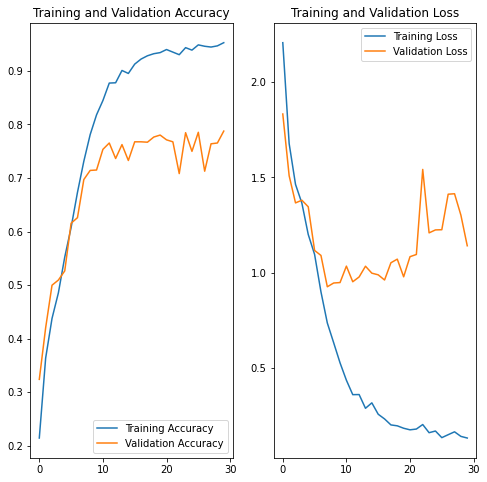

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epoch)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



### Observations:

1.The training accuracy seems to be nearly ~92%.

2.The validation accuracy is nearly ~78%.

3.The overall model accuracy improved, the class rebalance has helped treat the overfitting.
